In [237]:
import glob
import re
from collections import defaultdict
import pandas
import shutil
import os
import tqdm

In [2]:
paths = glob.glob("/Users/itsnamgyu/Downloads/HW/**/*.tif", recursive=True)

In [3]:
re_path = re.compile(".*/set ([0-9]{2})/char_data/(.{4})/.*HIL_[0-9]{3}_([0-9]{4})_([0-9]{4})_.*.tif")

In [204]:
character_sets = defaultdict(set)  # list of sets
all_matches = list() # [(dataset, char, set_index, set_sequence)]
original_paths = dict() # "<dataset><char><setindex><setsequence>"
for path in paths:
    match = re_path.match(path)
    match = match.groups()
    all_matches.append(match)
    dataset, char, set_index, set_sequence = match
    original_paths["".join(match)] = path
    character_sets[dataset].add(char)

In [5]:
common_set = character_sets["01"]
total_set = set()
for s in character_sets.values():
    common_set = common_set.intersection(s)
    total_set = total_set.union(s)

In [6]:
len(common_set)

1800

In [7]:
# Char counts
for key, s in sorted(character_sets.items()):
    print(key, len(s))

01 1800
02 2447
03 2447
04 2446
05 2446
06 2447
07 2447
08 2447
09 2447


In [8]:
# Missing chars (excluding 01)
for key, s in sorted(character_sets.items()):
    if key == "01":
        continue
    print(key, total_set - s)

02 set()
03 set()
04 {'005F'}
05 {'005F'}
06 set()
07 set()
08 set()
09 set()


In [9]:
def hex_to_char(h):
    return chr(int(h, 16))

In [10]:
s = common_set - character_sets["01"]

In [89]:
# All characters
for c in sorted(list(total_set)):
    print(hex_to_char(c), end="")

!"#$%&'()*+,-.0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_abcdefghijklmnopqrstuvwxyz{}~Σαβδεσ가각간갇갈갉갊감갑값갓갔강갖갗같갚갛개객갠갤갬갭갯갰갱갸갹갼걀걋걍걔걘걜거걱건걷걸걺검겁것겄겅겆겉겊겋게겐겔겜겝겟겠겡겨격겪견겯결겸겹겻겼경곁계곈곌곕곗고곡곤곧골곪곬곯곰곱곳공곶과곽관괄괆괌괍괏광괘괜괠괩괬괭괴괵괸괼굄굅굇굉교굔굘굡굣구국군굳굴굵굶굻굼굽굿궁궂궈궉권궐궜궝궤궷귀귁귄귈귐귑귓규균귤그극근귿글긁금급긋긍긔기긱긴긷길긺김깁깃깅깆깊까깍깎깐깔깖깜깝깟깠깡깥깨깩깬깰깸깹깻깼깽꺄꺅꺌꺼꺽꺾껀껄껌껍껏껐껑께껙껜껨껫껭껴껸껼꼇꼈꼍꼐꼬꼭꼰꼲꼴꼼꼽꼿꽁꽂꽃꽈꽉꽐꽜꽝꽤꽥꽹꾀꾄꾈꾐꾑꾕꾜꾸꾹꾼꿀꿇꿈꿉꿋꿍꿎꿔꿜꿨꿩꿰꿱꿴꿸뀀뀁뀄뀌뀐뀔뀜뀝뀨끄끅끈끊끌끎끓끔끕끗끙끝끼끽낀낄낌낍낏낑나낙낚난낟날낡낢남납낫났낭낮낯낱낳내낵낸낼냄냅냇냈냉냐냑냔냘냠냥너넉넋넌널넒넓넘넙넛넜넝넣네넥넨넬넴넵넷넸넹녀녁년녈념녑녔녕녘녜녠노녹논놀놂놈놉놋농높놓놔놘놜놨뇌뇐뇔뇜뇝뇟뇨뇩뇬뇰뇹뇻뇽누눅눈눋눌눔눕눗눙눠눴눼뉘뉜뉠뉨뉩뉴뉵뉼늄늅늉느늑는늘늙늚늠늡늣능늦늪늬늰늴니닉닌닐닒님닙닛닝닢다닥닦단닫달닭닮닯닳담답닷닸당닺닻닿대댁댄댈댐댑댓댔댕댜더덕덖던덛덜덞덟덤덥덧덩덫덮데덱덴델뎀뎁뎃뎄뎅뎌뎐뎔뎠뎡뎨뎬도독돈돋돌돎돐돔돕돗동돛돝돠돤돨돼됐되된될됨됩됫됴두둑둔둘둠둡둣둥둬뒀뒈뒝뒤뒨뒬뒵뒷뒹듀듄듈듐듕드득든듣들듦듬듭듯등듸디딕딘딛딜딤딥딧딨딩딪따딱딴딸땀땁땃땄땅땋때땍땐땔땜땝땟땠땡떠떡떤떨떪떫떰떱떳떴떵떻떼떽뗀뗄뗌뗍뗏뗐뗑뗘뗬또똑똔똘똥똬똴뙈뙤뙨뚜뚝뚠뚤뚫뚬뚱뛔뛰뛴뛸뜀뜁뜅뜨뜩뜬뜯뜰뜸뜹뜻띄띈띌띔띕띠띤띨띰띱띳띵라락란랄람랍랏랐랑랒랖랗래랙랜랠램랩랫랬랭랴략랸럇량러럭런럴럼럽럿렀렁렇레렉렌렐렘렙렛렝려력련렬렴렵렷렸령례롄롑롓로록론롤롬롭롯롱롸롼뢍뢨뢰뢴뢸룀룁룃룅료룐룔룝룟룡루룩룬룰룸룹룻룽뤄뤘뤠뤼뤽륀륄륌륏륑류륙륜률륨륩륫륭르륵른를름릅릇릉릊릍릎리릭린릴림립릿링마막만많맏말맑맒맘맙맛망맞맡맣매맥맨맬맴맵맷맸맹맺먀먁먈먕머먹먼멀멂멈멉멋멍멎멓메멕멘멜멤멥멧멨멩며멱면멸몃몄명몇몌모목몫몬몰몲몸몹못몽뫄뫈뫘뫙뫼묀묄묍묏묑묘묜묠묩묫무묵묶문묻물묽묾뭄뭅뭇뭉뭍뭏뭐뭔뭘뭡뭣뭬뮈뮌뮐뮤뮨뮬뮴뮷므믄믈믐믓미믹민믿밀밂밈밉밋밌밍및밑바

In [91]:
# Missing chars in 01
for c in sorted(total_set - character_sets["01"]):
    print(hex_to_char(c), end="")

!"#$%&'()*+,-.0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_abcdefghijklmnopqrstuvwxyz{}~Σαβδεσ가각갇갈갉갊갰갱갸갹걔걜겐겟겠겡겨격겪겯결겸겹곕괬괭군굿권귄균그극귿긋긍긴깐깖깟깠깡깨깩꺼꺽꺾껐껑께껙꼐꽂꾀꿀꿇꿈꿉꿴뀄뀌끗끙난낫났낭낮내낵낼냐냑냘넒넓넛넣네넥넬녀녁녈녹놋농뇌뇨뇩뇰뇹눈뉜느늑늘늙늚늠늦늪닒닝댐댑덴뎀뎁돈돤돼됴두둑둘둠둡뒝뒤뒵듐디딛딜딤딥땀땁뗄뗌뗍뙤뚠뚱뜨뜩뜯띄띌띳띵라락란랏럇량러럭럴럼럽렀렁렇레렉렷렸령롓로록롤롬롭뢨뢰뢸룔룝뤘뤠륌르를릇릉릊링마막맏맣매맥맬맴맵먕멀멈멉며멱멸몃몄명몌뫄묏뭔뭣뭬뮐뮨뮷믓밑밖밗반밟밧방뱃뱄뱅뱌뱍번변볏복볼봄봅뵐뵘뵙뵨붓붕붜붤뷘블븜븝빈빰빱뺄뺌뺍뻠뼁뼈뼉뽕뾰뿔뿜쀼쁑쁘쁠쁩삔삣삥사삭삳살삵삼삽샐샘샙섕서석섞섣설섬섭셀셈셉셰셸솅소속솎쇌쇠쇨쇰쇱숀숏숱쉔쉬쉭슐슨슷승시식쌘쌨쌩썅썲썼썽쎈쏀쏢쏭쏴쏵쐼쐽쑨쒔쒜쒼씔씜씬안앉않앰앱얄얌얍엄업엌엡연엶엷엿였옇예옰옷왓왔왕왜왝욘욧용우욱울욹욺월웜웝윗윙유육율을음읍이익일읽읾잇있잉잊쟀쟁쟈쟉쟤쟬저적절젊젱져좟좡좨죔죕중줘쥴쥼즈즉직질짊짢짤짬짭짼쪄쫄쫌쫍쫠쬈쭝쭤쮸쯔찧차착채책챵쳇쳉쳤쳬촌쵠쵯추축출춥췐츔츤칸캅컨컷컸컹케켁켈켰켱켸코콕콜콤콥쾡쾨쾰퀭큉큰탄탠탯탰탱탸턍턴텐텟텡텨톤통톼퇘툐튀튈틀틈틉틤틥틴팀팁팰팸팹펐펑페펙펠펨펩편퐝푀푸푹푿풂풋풍퓌퓨퓰퓸프플피픽핑하학할함합향험헙혐혠홅홋홍홴훈훤훵훼훽휀휸흔흣흥희힐힘힙

In [92]:
# Missing chars
print(total_set - character_sets["04"])
print(total_set - character_sets["05"])

{'005F'}
{'005F'}


## Set Analysis

- Complete sets: 2, 3, 6, 7, 8, 9
- Missing one: 4, 5
- Missing many: 1

In [14]:
data = defaultdict(list)
for match in all_matches:
    dataset, char, sid, sseq = match
    data["dataset"].append(dataset)
    data["char"].append(char)
    data["set_id"].append(sid)
    data["set_seq"].append(sseq)

In [15]:
df = pandas.DataFrame(data)

In [317]:
SET = "09"

In [318]:
df_set = df.loc[df.dataset == SET]
print(len(df_set))

206557


In [319]:
charset = set(df_set.char.unique())

In [320]:
char_counts = df_set.loc[df_set.char != "005F", "char"].value_counts()

In [321]:
char_counts.describe()

count    2446.000000
mean       82.782093
std        14.597936
min        66.000000
25%        79.000000
50%        81.000000
75%        82.000000
max       162.000000
Name: char, dtype: float64

<AxesSubplot:>

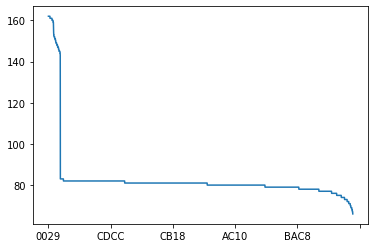

In [322]:
char_counts.plot()

In [323]:
len(df_set.loc[df.dataset == SET, "set_id"].unique())

82

<AxesSubplot:xlabel='set_id'>

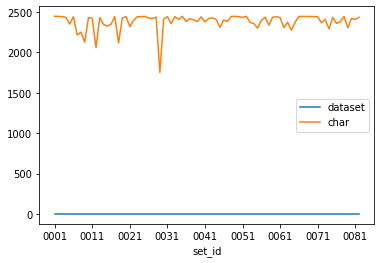

In [324]:
chars_by_set = df_set.loc[:,["dataset", "char", "set_id"]].groupby("set_id").nunique()
chars_by_set.plot()

<AxesSubplot:xlabel='char'>

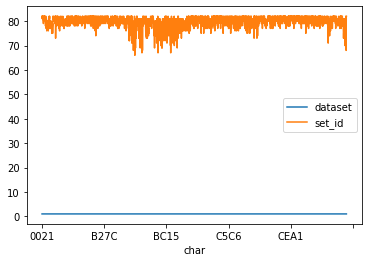

In [325]:
sets_by_char = df_set.loc[:,["dataset", "char", "set_id"]].groupby("char").nunique()
sets_by_char.plot()

## Output Files
Only for complete sets (sets that contain all characters)

In [ ]:
complete_sets = chars_by_set[chars_by_set.char == 2447].index

In [ ]:
df_complete = df_set.loc[df_set.set_id.isin(set(complete_sets)),:]

In [ ]:
OUTPUT_DIR = "/Users/itsnamgyu/Desktop/HW_OUTPUT"
for set_id in tqdm.tqdm(complete_sets):
    dfs = df_complete.loc[df_complete.set_id==set_id]
    for char in charset:
        values = dfs.loc[(dfs.char==char),:].values[0]
        assert(values[1] == char)
        key = "".join(values.tolist())
        source_path = original_paths[key]
        target_key = "D{dataset}_S{set_id}".format(dataset=values[0], set_id=values[2])
        target_path = os.path.join(OUTPUT_DIR, target_key, "{}.tif".format(char))
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        shutil.copyfile(source_path, target_path)

OUTPUT_DIR = "/Users/itsnamgyu/Desktop/HW_OUTPUT"
for set_id in tqdm.tqdm(complete_sets):
    dfs = df_complete.loc[df_complete.set_id==set_id]
    for char in charset:
        values = dfs.loc[(dfs.char==char),:].values[0]
        assert(values[1] == char)
        key = "".join(values.tolist())
        source_path = original_paths[key]
        target_key = "D{dataset}_S{set_id}".format(dataset=values[0], set_id=values[2])
        target_path = os.path.join(OUTPUT_DIR, target_key, "{}.tif".format(char))
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        shutil.copyfile(source_path, target_path)

In [326]:
complete_sets = chars_by_set[chars_by_set.char == 2447].index

In [327]:
df_complete = df_set.loc[df_set.set_id.isin(set(complete_sets)),:]

In [328]:
OUTPUT_DIR = "/Users/itsnamgyu/Desktop/HW_OUTPUT"
for set_id in tqdm.tqdm(complete_sets):
    dfs = df_complete.loc[df_complete.set_id==set_id]
    for char in charset:
        values = dfs.loc[(dfs.char==char),:].values[0]
        assert(values[1] == char)
        key = "".join(values.tolist())
        source_path = original_paths[key]
        target_key = "D{dataset}_S{set_id}".format(dataset=values[0], set_id=values[2])
        target_path = os.path.join(OUTPUT_DIR, target_key, "{}.tif".format(char))
        os.makedirs(os.path.dirname(target_path), exist_ok=True)
        shutil.copyfile(source_path, target_path)

100%|██████████| 5/5 [00:36<00:00,  7.30s/it]
